In [6]:
import pandas
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [7]:
import xgboost as xgb
from sklearn.cross_validation import train_test_split
from sklearn.metrics import log_loss

In [58]:
train = pd.read_csv("train.csv")

In [8]:
#sample_submission = pd.read_csv("sample_submission.csv")

In [77]:
def initial_cleaning_data_process():
    train = pd.read_csv("train.csv")
    test = pd.read_csv("test.csv")
    train['Product_Info_2'] = pd.factorize(train['Product_Info_2'])[0]
    test['Product_Info_2'] = pd.factorize(test['Product_Info_2'])[0]
    train['Response'] = train['Response'].astype(int)

    #train.Product_Info_2 = train.Product_Info_2.map({'A1': 1,'A2': 2,'A3':3,'A4':4,'A5':5,
               #'A6': 6,'A7': 7, 'A8':8, 'B1': 9,
               #'B2': 10, 'C1': 11, 'C2':12, 'C3':13,
               #'C4':14, 'D1': 15, 'D2': 16,'D3': 17, 'D4':18,'E1':19})
    #test.Product_Info_2 = test.Product_Info_2.map({'A1': 1,'A2': 2,'A3':3,'A4':4,'A5':5,
               #'A6': 6,'A7': 7, 'A8':8, 'B1': 9,
               #'B2': 10, 'C1': 11, 'C2':12, 'C3':13,
               #'C4':14, 'D1': 15, 'D2': 16,'D3': 17, 'D4':18,'E1':19})
    train = train.fillna(-999.0)
    test = test.fillna(-999.0)
    mytrain, mytest = train_test_split(train, test_size = .4)
    return mytrain, mytest, test

In [78]:
mytrain, mytest, test = initial_cleaning_data_process()

In [79]:
dtrain = xgb.DMatrix(np.asarray(mytrain.iloc[:,1:127]), 
                     label = np.asarray(mytrain.Response), missing = -999)
dtest = xgb.DMatrix(np.asarray(mytest.iloc[:,1:127]), 
                    label = np.asarray(mytest.Response), missing = -999)

In [74]:
mytrain.Response.value_counts()

8    11664
6     6753
7     4837
2     3871
1     3697
5     3348
4      846
3      612
Name: Response, dtype: int64

In [75]:
1.832153
num_round = 500
param1 = {'objective': "reg:linear", #"min_child_weight" : 240,
         "subsample" : 1, "colsample_bytree" : 0.67, "eta" : 0.05}
watchlist1 = [(dtrain,'train'), (dtest, 'eval')]

bst = xgb.train(param1, dtrain, num_round, watchlist1, early_stopping_rounds=5)

Will train until eval error hasn't decreased in 5 rounds.
[0]	train-rmse:5.451413	eval-rmse:5.445240
[1]	train-rmse:5.216463	eval-rmse:5.211309
[2]	train-rmse:4.994241	eval-rmse:4.989998
[3]	train-rmse:4.784658	eval-rmse:4.781496
[4]	train-rmse:4.589509	eval-rmse:4.587770
[5]	train-rmse:4.403473	eval-rmse:4.402776
[6]	train-rmse:4.232525	eval-rmse:4.233318
[7]	train-rmse:4.068556	eval-rmse:4.070889
[8]	train-rmse:3.913136	eval-rmse:3.916756
[9]	train-rmse:3.767966	eval-rmse:3.772775
[10]	train-rmse:3.632101	eval-rmse:3.638733
[11]	train-rmse:3.504174	eval-rmse:3.512138
[12]	train-rmse:3.383663	eval-rmse:3.393254
[13]	train-rmse:3.271287	eval-rmse:3.282700
[14]	train-rmse:3.166025	eval-rmse:3.179265
[15]	train-rmse:3.069155	eval-rmse:3.084450
[16]	train-rmse:2.979457	eval-rmse:2.996798
[17]	train-rmse:2.894163	eval-rmse:2.913332
[18]	train-rmse:2.813762	eval-rmse:2.834712
[19]	train-rmse:2.739516	eval-rmse:2.762375
[20]	train-rmse:2.670080	eval-rmse:2.694975
[21]	train-rmse:2.605991	eva

In [80]:
predictions = bst.predict(xgb.DMatrix(np.asarray(test.iloc[:,1:])))

In [ ]:
#format_predictions.to_csv("submissions/linear_regression_optimized.csv", index=False)

In [81]:
train_predictions = bst.predict(xgb.DMatrix(np.asarray(mytest.iloc[:,1:127])))

In [87]:
train_predictions = np.clip(train_predictions, -0.99, 8.99)
predictions = np.clip(predictions, -0.99, 8.99)

In [93]:
train_predictions[train_predictions <= 2]

array([ 1.86227942,  1.75827909,  1.43387127, ...,  1.3452903 ,
        1.19408846,  1.85760891], dtype=float32)

In [94]:
train_predictions[(train_predictions > 2) & (train_predictions < 3)]

array([ 2.61067724,  2.69169521,  2.64968491, ...,  2.60672188,
        2.43414211,  2.940521  ], dtype=float32)

In [86]:
#train_predictions_dataframe = pd.DataFrame(train_predictions)
#train_predictions_dataframe[train_predictions_dataframe[0] > 7]

,0
196,7.009859
763,7.213717
1108,7.104385
1432,7.113187
1589,7.044561
1873,7.042541
2350,7.004028
2840,7.096885
3289,7.083301
3627,7.096536


In [576]:
def format_predictions(predictions):
    test_ids = test.Id
    formatted_predictions = np.column_stack((test_ids, predictions))
    formatted_predictions = pd.DataFrame(formatted_predictions)
    formatted_predictions = formatted_predictions.rename(columns={0:"Id", 1:"Response"})
    formatted_predictions.Response = formatted_predictions.Response.round(0)
    formatted_predictions.Id = formatted_predictions.Id.astype(int)
    formatted_predictions.Response = formatted_predictions.Response.astype(int)
    formatted_predictions.Response[formatted_predictions.Response <= 0] = 1
    return formatted_predictions

def format_predictions_mytest(predictions):
    mytest_ids = mytest.Id
    formatted_predictions = np.column_stack((mytest_ids, predictions))
    formatted_predictions = pd.DataFrame(formatted_predictions)
    formatted_predictions = formatted_predictions.rename(columns={0:"Id", 1:"Response"})
    formatted_predictions.Response = formatted_predictions.Response.round(0)
    formatted_predictions.Id = formatted_predictions.Id.astype(int)
    formatted_predictions.Response = formatted_predictions.Response.astype(int)
    formatted_predictions.Response[formatted_predictions.Response <= 0] = 1
    return formatted_predictions

In [579]:
def results_table(train_predictions):
    train_predictions = format_predictions_mytest(train_predictions)
    train_predictions = train_predictions.set_index("Id")
    train_predictions = train_predictions.rename(columns={"Response": "Predictions"})
    training_answers = pd.DataFrame(mytest.set_index("Id").iloc[:,-1])
    training_answers = training_answers.rename(columns={"Response": "Actual"})
    results = pd.concat([training_answers, train_predictions], axis=1)

    alist = []
    for x, y in np.asarray(results):
        count = 0
        if x == y:
            count = 1
        alist.append(count)
        
    accuracy_measure = pd.DataFrame(np.asarray(alist)).rename(columns={0:"Correct"})
    accuracy_measure = pd.concat([accuracy_measure, pd.DataFrame(results.index)], axis=1).set_index("Id")
    results = pd.concat([results, accuracy_measure], axis=1)
    accuracy_graphing = results.set_index("Actual").iloc[:,1:]
    accuracy_graphing_grouping = accuracy_graphing.groupby(by=accuracy_graphing.index)
    accuracy_graphing = accuracy_graphing_grouping.agg(np.sum)
    accuracy_graphing = pd.concat([accuracy_graphing, pd.DataFrame(results.Actual.value_counts(sort=False))], 
         axis=1)
    accuracy_graphing["Pct Accurate"] = accuracy_graphing.Correct / accuracy_graphing.Actual
    accuracy_graphing["Pct of Total"] = accuracy_graphing.Actual / 23753
    accuracy_graphing = accuracy_graphing.round(2)
    accuracy_graphing.index.names = ['Response']
    return accuracy_graphing

In [608]:
results = results_table(predictions_notproba)

In [609]:
print("Overall Accuracy = {:.2%}".format(sum(results.Correct) / sum(results.Actual)))
results

Overall Accuracy = 20.12%


,Correct,Actual,Pct Accurate,Pct of Total
Response,,,,
1,183,2479,0.07,0.10
2,193,2617,0.07,0.11
3,46,404,0.11,0.02
4,30,554,0.05,0.02
5,753,2203,0.34,0.09
6,1654,4485,0.37,0.19
7,744,3167,0.23,0.13
8,1175,7844,0.15,0.33


In [594]:
from sklearn.linear_model import LinearRegression

In [607]:
lr = LinearRegression()
lr.fit(X = np.asarray(mytrain.iloc[:,1:127]), y = np.asarray(mytrain.Response))

#predictions = lr.predict_proba(np.asarray(mytest.iloc[:,1:127]))
predictions_notproba = lr.predict(np.asarray(mytest.iloc[:,1:127]))

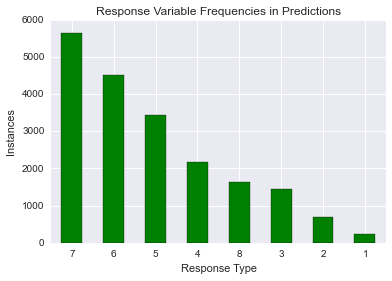

In [195]:
ax = format_predictions.Response.value_counts().plot(kind="bar", color="green", title="Response Variable Frequencies in Predictions", rot=360)
ax.set_xlabel("Response Type")
ax.set_ylabel("Instances")

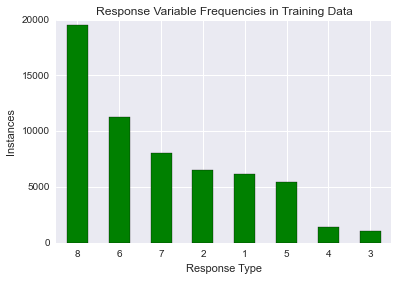

In [161]:
ax = train.Response.value_counts().plot(kind="bar", color="green", title="Response Variable Frequencies in Training Data", rot=360)
ax.set_xlabel("Response Type")
ax.set_ylabel("Instances")

There is a huge discrepancy here. Risk type 8 should be much more frequently predicted than it is. I highly believe it has to do with how I am rounding the predictions, since they are all in decimal form resulting from linear regression.

In [227]:
predictions = bst.predict(xgb.DMatrix(np.asarray(test.iloc[:,1:])))
test_ids = test.Id
formatted_predictions = np.column_stack((test_ids, predictions))
formatted_predictions = pd.DataFrame(formatted_predictions)
formatted_predictions = formatted_predictions.rename(columns={0:"Id", 1:"Response"})
formatted_predictions.Response = formatted_predictions.Response + .5
formatted_predictions.Response = formatted_predictions.Response.round(0)
formatted_predictions.Id = formatted_predictions.Id.astype(int)
formatted_predictions.Response = formatted_predictions.Response.astype(int)
formatted_predictions.Response[formatted_predictions.Response <= 0] = formatted_predictions[formatted_predictions.Response == 0] = 1
formatted_predictions.Response[formatted_predictions.Response > 8 ] = formatted_predictions[formatted_predictions.Response == 0] = 8

In [228]:
formatted_predictions.to_csv("submissions/linear_regression_adding_5.csv", index=False)

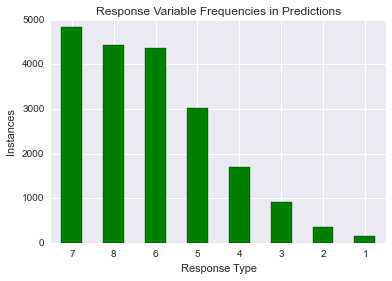

In [226]:
ax = formatted_predictions.Response.value_counts().plot(kind="bar", color="green", title="Response Variable Frequencies in Predictions", rot=360)
ax.set_xlabel("Response Type")
ax.set_ylabel("Instances")

In [209]:
formatted_predictions[(formatted_predictions['Response'] > 6.5) & (formatted_predictions['Response'] < 7.5)].count()

Id          4361
Response    4361
dtype: int64

In [210]:
formatted_predictions[formatted_predictions['Response'] > 7.5].count()

Id          7074
Response    7074
dtype: int64

In [211]:
formatted_predictions[formatted_predictions['Response'] < 1.5].count()

Id          77
Response    77
dtype: int64

In [212]:
formatted_predictions[formatted_predictions['Response'] < 0].count()

Id          0
Response    0
dtype: int64

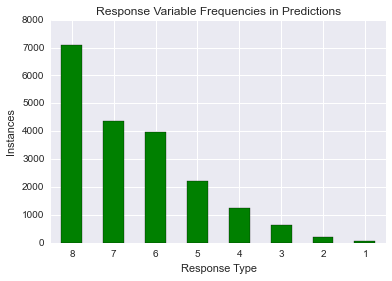

In [200]:
formatted_predictions

,Id,Response
0,1,4.485847
1,3,7.158654
2,4,6.814400
3,9,6.677236
4,12,7.039287
5,13,7.821156
6,21,7.654713
7,28,8.240789
8,30,5.950975
9,36,7.920014


The next step is to determine the best rounding cutoff points to optimize the predictions. Simply rounding at .5 is not cutting it.

With Python, you can use optimise.fmin from scipy package and use a 7 variables function that transforms your validation output to predict the best cuts for quadratic weighted kappa.
